In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf

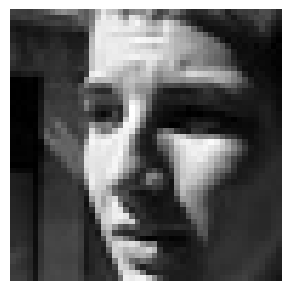

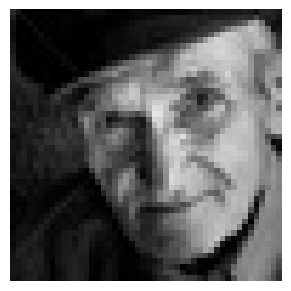

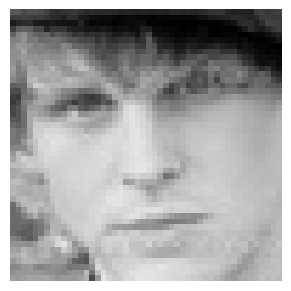

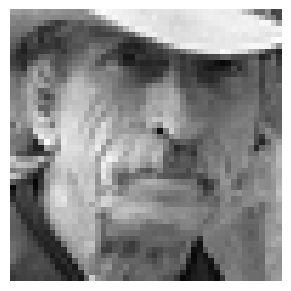

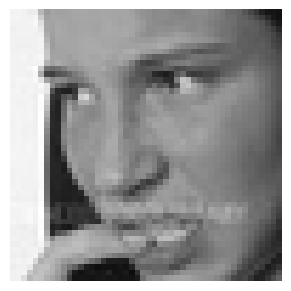

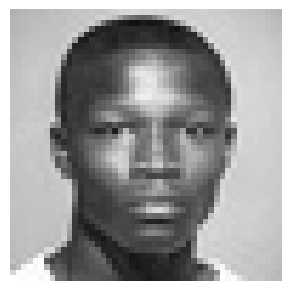

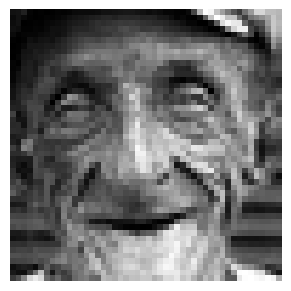

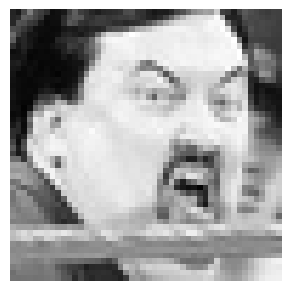

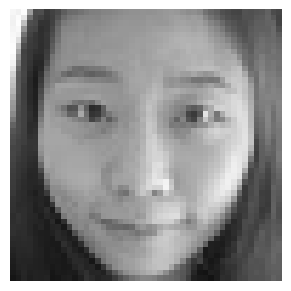

In [2]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

In [3]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.25)(x)
    return x

In [4]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    return x

In [5]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))
    
    flatten = Flatten()(conv_3)
    dense_1 = Dense_f(flatten,256)
    
    output = Dense(7, activation = "softmax")(dense_1)
    model = Model(inputs = [inputs], outputs = [output])
    model.compile(loss = ['categorical_crossentropy'], optimizer = 'adam', metrics = ['accuracy'])
    return model

In [6]:
model = model_fer((48,48,1))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0     

In [7]:
image_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/", target_size=(image_size,image_size), color_mode = "grayscale", batch_size = batch_size, class_mode = "categorical", shuffle = True)

datagen_validation = ImageDataGenerator()
train_validation = datagen_train.flow_from_directory("test/", target_size=(image_size,image_size), color_mode = "grayscale", batch_size = batch_size, class_mode = "categorical", shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [8]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = train_validation.n//train_validation.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', save_weights_only = True, mode = 'max', verbose = 1)
callback = [checkpoint]

In [9]:
history = model.fit(x = train_generator, steps_per_epoch = steps_per_epoch, epochs = epochs, validation_data = train_validation, validation_steps = validation_steps, callbacks = callback)

Epoch 1/15
448/448 [==============================] - ETA: 0s - loss: 1.6916 - accuracy: 0.3546
Epoch 1: saving model to model_weights.h5
448/448 [==============================] - 152s 337ms/step - loss: 1.6916 - accuracy: 0.3546 - val_loss: 1.5938 - val_accuracy: 0.4184
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.3899 - accuracy: 0.4662
Epoch 2: saving model to model_weights.h5
448/448 [==============================] - 169s 377ms/step - loss: 1.3899 - accuracy: 0.4662 - val_loss: 1.4331 - val_accuracy: 0.4643
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.2770 - accuracy: 0.5144
Epoch 3: saving model to model_weights.h5
448/448 [==============================] - 151s 337ms/step - loss: 1.2770 - accuracy: 0.5144 - val_loss: 1.3735 - val_accuracy: 0.4782
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 1.2053 - accuracy: 0.5424
Epoch 4: saving model to model_weights.h5
448/448 [==============================] - 

In [10]:
model.evaluate(train_validation)

113/113 [==============================] - 4s 33ms/step - loss: 1.1060 - accuracy: 0.6081


[1.1060017347335815, 0.6081081032752991]

In [11]:
model_json = model.to_json()
with open("model_ed.json","w") as json_file:
    json_file.write(model_json)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train', 'Validation'], loc="upper left")
plt.subplots_adjust(top=1.0,bottom=0.0, right=0.95,left=0.0,hspace=0.25,wspace=0.35)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train', 'Validation'], loc="upper left")
plt.subplots_adjust(top=1.0,bottom=0.0, right=0.95,left=0.0,hspace=0.25,wspace=0.35)